<a href="https://colab.research.google.com/github/cohenkslaf/Getting_into_Business/blob/main/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Investment Data Exploration  
### Author: Kasey Cohen  
### Course: DS 201.01 Real Estate Data Analysis  
### Date: 02/28/2024  

# 1. Understanding Our Data  

### - Data Acquisition  

#   ◦ Time Range/When was the Data Acquired From?  
#####     The dataset includes house prices spanning from 2000 to 2023, providing insights into trends across more than two decades of the U.S. housing market.
#####     The data was collected at various points throughout this period, allowing for analysis of market changes over time.  

#   ◦ Geographical Coverage/Where was the Data Acquired?  
#####     The dataset covers a wide range of geographical locations across the United States. This includes both urban and suburban areas, with properties from cities and towns in multiple states, ensuring diverse regional representation.  

#   ◦ Data Collection Method  
#####     The data was acquired from publicly available sources, including real estate listings, public records, and reports from real estate agencies.
#####     It was likely compiled from various websites and platforms to ensure broad coverage.

# - Data Types Summary/What Type of Data do These Attributes Contain?

#   ◦ Nominal (Categorical) Data:  
#####     - Waterfront  
#####     - Street  
#####     - City  
#####     - Statezip  
#####     - Country  

#   ◦ Ordinal Data:  
#####     - View  
#####     - Condition  

#   ◦ Interval Data (Numeric with no absolute zero, can add and subtract):  
#####     - Date  
#####     - Yr Built  
#####     - Yr Renovated  

#   ◦ Ratio Data (Numeric with absolute zero, can add, subtract, multiply, and divide):  
#####     - Price  
#####     - Bedrooms  
#####     - Bathrooms  
#####     - Sqft Living  
#####     - Sqft Lot  
#####     - Floors  
#####     - Sqft Above  
#####     - Sqft Basement  


Here we are downloading the data from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

print("Path to dataset files:", path)
import pandas as pd

# Define the path to the CSV file
csv_path = "/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
data


Path to dataset files: /root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA



## 2. Data Exploration and Analysis  

- ### Import Necessary Libraries  

  ```python
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  ```

- ### Loading the Dataset  

  ```python
  import kagglehub

  # Download the latest version of the dataset
  path = kagglehub.dataset_download("fratzcan/usa-house-prices")
  csv_path = "/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv"

  # Load the CSV file into a DataFrame
  data = pd.read_csv(csv_path)

  # Display the first few rows of the DataFrame
  data.head()
  ```

- ### 1. Summary Statistics (Mean, Median, Mode, Range, Standard Deviation)  

  ```python
  # Summary Statistics
  summary_stats = data.describe().transpose()
  summary_stats['range'] = summary_stats['max'] - summary_stats['min']

  # Display summary statistics
  print("Summary Statistics:")
  print(summary_stats[['mean', '50%', 'std', 'min', 'max', 'range']])

  # Mode for categorical and ordinal features
  print("\nMode for Categorical and Ordinal Features:")
  mode_values = data.mode().iloc[0]
  print(mode_values)
  ```

- ### 2. Identify Missing Values (NA) and Discuss Potential Strategies to Handle Them  

  ```python
  # Identify Missing Values
  missing_values = data.isnull().sum()

  # Display missing values
  print("\nMissing Values:")
  print(missing_values[missing_values > 0])
  ```

- ### 3. Handle Missing Values  

  - **Numerical Columns**: Apply median imputation for missing numerical data.  
  - **Categorical Columns**: Apply mode imputation for missing categorical data.  

  ```python
  # Select only the numeric columns
  numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

  # Apply median imputation to numerical columns
  data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

  # Select categorical columns
  categorical_columns = data.select_dtypes(include=['object']).columns

  # Apply mode imputation to categorical columns
  data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
  ```

- ### 4. Visualizations  
  - Boxplots for numerical columns: Identifies outliers in the data.  
  - Scatter Plot: Explore the relationship between `Price` and `Sqft Living`.  

  ```python
  # Calculate number of rows and columns needed for subplots
  num_columns = 4  # You can set this to any number that fits your display preferences
  num_rows = (len(numerical_columns) // num_columns) + (1 if len(numerical_columns) % num_columns != 0 else 0)

  # Adjust figure size based on number of rows
  plt.figure(figsize=(15, 5 * num_rows))

  # Boxplots for numerical columns to detect outliers
  plt.figure(figsize=(15, 5 * num_rows))  # Adjust height based on number of rows
  for i, column in enumerate(numerical_columns, 1):
      plt.subplot(num_rows, num_columns, i)
      sns.boxplot(x=data[column])
      plt.title(f'{column} Boxplot')

  plt.tight_layout()
  plt.show()

  # Scatter plot to explore the relationship between 'Price' and 'Sqft Living'
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=data, x='Sqft Living', y='Price')
  plt.title('Price vs. Sqft Living')
  plt.xlabel('Square Feet of Living Area')
  plt.ylabel('Price (USD)')
  plt.show()
  ```

- ### Summary

  - **Summary Statistics**: We computed key statistics such as the mean, median, mode, range, and standard deviation for all numerical columns.
  - **Missing Values**: We identified and handled missing values by imputing the median for numerical columns and the mode for categorical columns.
  - **Visualizations**: Various visualizations (histograms, boxplots, scatter plots) were generated to help understand the distribution of data, detect outliers, and explore relationships between features.



# Import necessary libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
import kagglehub





# Data Loading and Preparation



In [ ]:

# Download the latest version of the dataset
path = kagglehub.dataset_download("fratzcan/usa-house-prices")
csv_path = "/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(csv_path)

# Handle Missing Values
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])


# Summary Statistics and Data Overview


In [ ]:


# Summary Statistics
summary_stats = data.describe().transpose()
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
print("Summary Statistics:")
print(summary_stats[['mean', '50%', 'std', 'min', 'max', 'range']])

# Mode for categorical and ordinal features
print("\nMode for Categorical and Ordinal Features:")
mode_values = data.mode().iloc[0]
print(mode_values)

# Identify Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Summary Statistics:
                        mean        50%            std     min          max  \
price          553062.877289  460000.00  583686.452245     0.0  26590000.00   
bedrooms            3.400483       3.00       0.903939     0.0         8.00   
bathrooms           2.163043       2.25       0.784733     0.0         6.75   
sqft_living      2143.638889    1980.00     957.481621   370.0     10040.00   
sqft_lot        14697.638164    7676.00   35876.838123   638.0   1074218.00   
floors              1.514130       1.50       0.534941     1.0         3.50   
waterfront          0.007488       0.00       0.086219     0.0         1.00   
view                0.246618       0.00       0.790619     0.0         4.00   
condition           3.452415       3.00       0.678533     1.0         5.00   
sqft_above       1831.351449    1600.00     861.382947   370.0      8020.00   
sqft_basement     312.287440       0.00     464.349222     0.0      4820.00   
yr_built         1970.814010    

# Visualizations

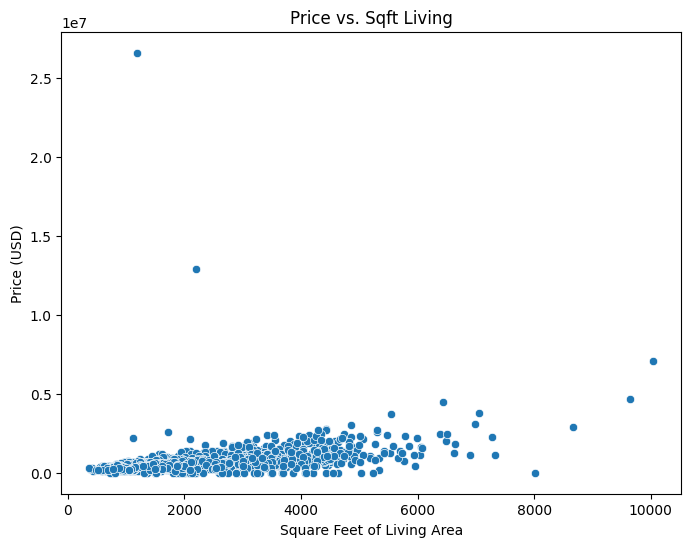

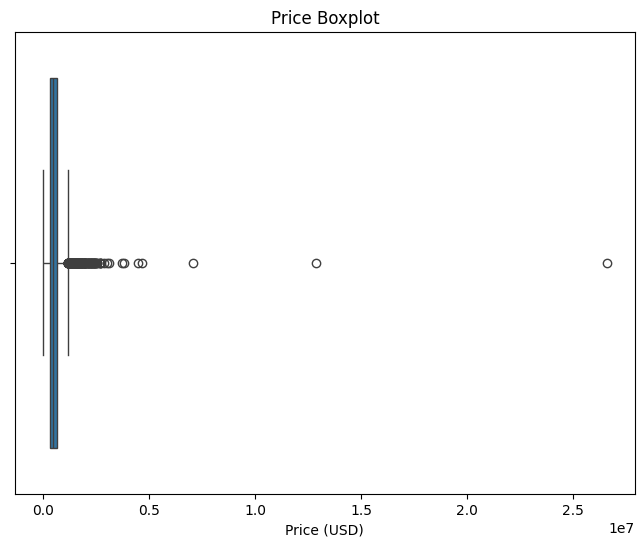

In [ ]:


# 1. Scatter plot to explore 'Price' vs 'Sqft Living'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sqft_living', y='price')
plt.title('Price vs. Sqft Living')
plt.xlabel('Square Feet of Living Area')
plt.ylabel('Price (USD)')
plt.show()

# 2. Boxplot for 'Price' to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'])
plt.title('Price Boxplot')
plt.xlabel('Price (USD)')
plt.show()


# 1. Scatter Plot: 'Price' vs 'Sqft Living'

The scatter plot shows the relationship between the square footage of the living area ('sqft_living') and the price of the property ('price').
- X-axis (sqft_living): Represents the square footage of the living area. The mean is 2143.64 sq. ft., with the range spanning from 370 sq. ft. to 10,040 sq. ft.
- Y-axis (price): Represents the price of the house in USD. The mean price is $553,062, with a wide range from a minimum of $0 (indicating potential data entry issues or homes listed for free or extremely discounted) to a maximum of $26.59 million (indicating extremely high-end properties).

Why it’s Significant:
- Positive correlation expected: Typically, as the square footage of the house increases, we expect the price to increase as well. This is standard in the real estate market, where larger homes tend to be more expensive.
- Outliers: The scatter plot will likely show:
  - Extremely high-priced homes (close to $26.59 million) with larger square footage.
  - Low-priced homes (close to $0) could be outliers or data errors.
- Data spread: Most of the data points will likely cluster around the median values for both price and square footage (around $460,000 and 1,980 sq. ft.). The scatter plot helps visualize if larger homes are priced higher and highlights any anomalies or trends.


# 2. Boxplot: 'Price' to Identify Outliers

The boxplot summarizes the distribution of the 'price' variable:
- Minimum price: $0, which may indicate missing data or problematic entries in the dataset.
- 25th percentile (Q1): Represents the lower quartile, indicating that 25% of homes are priced below this value.
- Median (50%): The median price is $460,000, meaning half of the homes are priced below this value.
- 75th percentile (Q3): Represents the upper quartile, indicating that 75% of homes are priced below this value.
- Maximum price: $26.59 million, showing a high variation in prices, with luxury homes driving up the maximum.
- Outliers: Any data points beyond the whiskers of the boxplot are considered outliers. Given the large price range, we can expect to see:
  - Outliers on the high end, which might represent luxury or unique properties (e.g., historic homes, waterfront properties).
  - Outliers on the low end, potentially representing errors in the data or properties sold under extreme conditions (e.g., foreclosures).

Why it’s Significant:
- Identifying extreme prices: The boxplot helps identify outliers, which could point to data entry issues or properties with unique characteristics.
- Skewness: The plot may reveal if the price distribution is positively skewed (a longer right whisker), meaning more low-priced homes are on the market, but a few high-priced homes significantly raise the average.
- Price concentration: The boxplot gives a quick overview of where most prices are concentrated. If the distribution shows a concentration in the middle of the range, it suggests that most properties fall within a similar price range.


# 3. Additional Observations Based on Summary Statistics and the Visualizations:

- Skewed Distribution: The mean price ($553,062) is much higher than the median price ($460,000), suggesting the price distribution is positively skewed. This means the majority of properties are priced lower, but a small number of high-priced homes are pulling the average price upwards.
- Outliers at Both Ends: The boxplot and scatter plot together reveal outliers:
  - Extremely low-priced homes (close to $0) could represent data entry issues or unique sales scenarios.
  - Very high-priced homes (near $26.59 million) are likely luxury properties driving up the overall distribution.

These visualizations, in conjunction with the summary statistics, provide valuable insights into the real estate data, revealing trends, anomalies, and patterns that can help in further analysis or decision-making.



# 3. Expanding Investment Knowledge

Beyond this dataset, exploring other datasets related to real estate can provide a broader context and allow for more informed investment strategies. Here’s an additional dataset that could complement your analysis:

#### Additional Dataset: [Zillow Home Value Index (ZHVI)](https://www.zillow.com/research/data/)

- **Why would this dataset be useful?**  
  The Zillow Home Value Index (ZHVI) is a comprehensive dataset of home values in the United States. It provides insights into trends over time, including home value appreciation, which could be essential in determining whether an area is experiencing growth or decline. By combining this dataset with your current housing price data, you can gain a deeper understanding of how local market conditions may impact property values.

- **How could it complement the data you are currently analyzing?**  
  While the current dataset gives specific details on individual house sales (price, size, location, etc.), the ZHVI dataset provides a high-level overview of market trends across various regions. This could help you identify areas with rising property values or declining markets, which could be useful for long-term investment decisions. The ZHVI dataset could help identify broader regional trends that may not be visible at the individual property level in your dataset.

- **Provide a link to the additional dataset.**  
  You can access the Zillow Home Value Index dataset through [this link](https://www.zillow.com/research/data/). This dataset includes historical home value data by region, allowing you to analyze trends in different parts of the U.S.
